In [2]:
!pip install neuralforecast
!pip install torchinfo
!pip install codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Memulai Proses Utama...
Mengunduh data dari: https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/5b204ef45db85a9ff4e283dd74941dbc117ad287/dataset/australian_electricity_demand_dataset.tsf
Data berhasil diunduh.
Menemukan 5 series dalam data.
Memulai parsing data series...
Parsing selesai. 5 series berhasil diparsing.
Memilih state: NSW (Index: 0) dengan 230736 titik data, mulai dari 2002-01-01 00:00:00+00:00.
Tidak ada nilai NaN dalam data.

--- Menampilkan Data Awal dan Akhir (Setelah Pembersihan) ---
Data untuk state: NSW
Total data points: 230736

10 Data Pertama:
0    5714.045004
1    5360.189078
2    5014.835118
3    4602.755516
4    4285.179828
5    4074.894442
6    3942.936134
7    3883.997482
8    3877.679938
9    3837.716602
dtype: float64

10 Data Terakhir:
230726    7005.604882
230727    6833.388248
230728    6605.688936
230729    6383.644566
230730    6249.995358
230731    6083.964216
230732    5986.856742
230733    5749.355504
230734    5505.215700
2

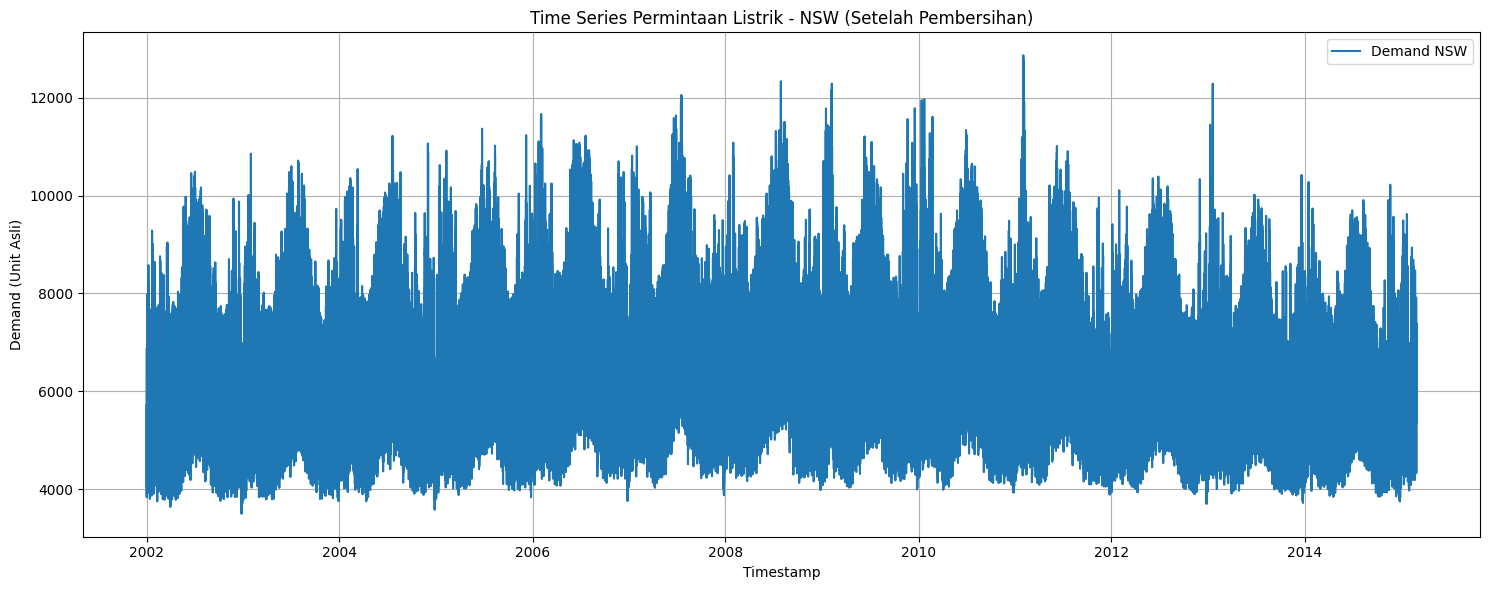

INFO:lightning_fabric.utilities.seed:Seed set to 1


Plot time series ditampilkan.
--------------------------------------------------
Normalisasi data (MinMaxScaler ke rentang [0, 1])...
Data dinormalisasi. Contoh 5 data pertama ternormalisasi: [0.23652852 0.19875331 0.1618857  0.11789493 0.08399275]
--------------------------------------------------
Membuat 3 fold CV:
  Panjang data total: 230736
  Horizon (Test set per fold): 24
  Step size antar fold: 24
  Panjang window training per fold: 230616
  Fold 1: Train indices [0:230616], Test indices [230616:230640]
  Fold 2: Train indices [24:230640], Test indices [230640:230664]
  Fold 3: Train indices [48:230664], Test indices [230664:230688]

Berhasil membuat 3 fold untuk Cross-Validation.
--------------------------------------------------
Memulai Cross-Validation...

===== Memproses Fold 1/3 =====
Fold 1: Data train disiapkan (230616 baris)
Fold 1: Data test disiapkan (24 baris)

Terjadi error dalam proses utama: max_epochs is deprecated, use max_steps instead.

Total Waktu Eksekusi Ke

Traceback (most recent call last):
  File "<ipython-input-1-c93ac07065eb>", line 397, in <cell line: 0>
    model = NHITS(h=HORIZON, input_size=INPUT_WINDOW_SIZE, loss=LOSS_FUNCTION,
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/neuralforecast/models/nhits.py", line 293, in __init__
    super(NHITS, self).__init__(
  File "/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py", line 281, in __init__
    raise Exception("max_epochs is deprecated, use max_steps instead.")
Exception: max_epochs is deprecated, use max_steps instead.


In [1]:
# ==============================================================================
# Import Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS, LSTM
from neuralforecast.losses.pytorch import MAE, MSE # Impor loss lain jika perlu
from sklearn.preprocessing import MinMaxScaler
import time
import psutil # Diimpor tapi tidak digunakan di versi ini
import os
from codecarbon import EmissionsTracker
import random
import torch
import logging
import requests # Untuk membaca URL

# ==============================================================================
# Konfigurasi & Hyperparameters
# ==============================================================================
# --- Pengaturan Reproducibility ---
seed = 42
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
    # Opsi tambahan untuk determinisme CUDA (bisa sedikit lebih lambat)
    # torch.backends.cudnn.deterministic = True
    # torch.backends.cudnn.benchmark = False

# --- Pengaturan Dataset & Preprocessing ---
# URL raw file TSF dari GitHub
# DATASET_URL = "https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/5b204ef45db85a9ff4e283dd74941dbc117ad287/dataset/australian_electricity_demand_dataset.tsf"
DATASET_URL = "https://raw.githubusercontent.com/kanadakurniawan/loss-function-comparison/5b204ef45db85a9ff4e283dd74941dbc117ad287/dataset/australian_electricity_demand_dataset.tsf"
# Indeks negara bagian yang akan digunakan (0: NSW, 1: QLD, 2: SA, 3: TAS, 4: VIC)
SELECTED_STATE_INDEX = 0
# Metode imputasi NaN ('ffill_bfill', atau bisa dikembangkan 'mean', 'median', 'interpolation', dll.)
NAN_IMPUTATION_METHOD = 'ffill_bfill'

# --- Pengaturan Model NeuralForecast ---
# Pilihan: 'NBEATS', 'NHITS', 'LSTM'
# Catatan: Parameter spesifik model mungkin perlu disesuaikan jika model diganti
MODEL_NAME = 'NHITS'
# Ukuran window input (jumlah langkah waktu historis untuk prediksi)
INPUT_WINDOW_SIZE = 48
# Horizon prediksi (jumlah langkah waktu ke depan yang ingin diprediksi)
HORIZON = 24
# Fungsi loss untuk training model (dari neuralforecast.losses.pytorch)
LOSS_FUNCTION = MAE()
# Jumlah epoch training per fold
EPOCHS = 10 # Mungkin perlu ditingkatkan untuk konvergensi yang lebih baik
# Ukuran batch untuk training
BATCH_SIZE = 32
# Ukuran validasi internal saat fit (menggunakan data terakhir dari training set fold)
VALIDATION_SIZE_FIT = HORIZON

# --- Pengaturan Cross-Validation ---
# Jumlah fold cross-validation
N_CROSSVALIDATION_FOLDS = 3
# Ukuran langkah (step) pergeseran window untuk fold berikutnya
CV_STEP_SIZE = 24 # Harus kelipatan HORIZON untuk evaluasi yang tidak tumpang tindih

# --- Pengaturan Lainnya ---
# Set environment variable untuk kompatibilitas NeuralForecast
os.environ['NIXTLA_ID_AS_COL'] = '1'
# Mengatur level log CodeCarbon agar tidak terlalu verbose
logging.getLogger("codecarbon").setLevel(logging.ERROR)
# Frekuensi data (misalnya '30min', 'H', 'D') - sesuaikan dengan dataset
DATA_FREQ = '30min'

# ==============================================================================
# Fungsi Helper
# ==============================================================================

def read_tsf_from_url(url):
    """Membaca file TSF dari URL dan mengembalikan list string data."""
    print(f"Mengunduh data dari: {url}")
    try:
        response = requests.get(url)
        response.raise_for_status() # Check jika request gagal
        lines = response.text.splitlines()
        print("Data berhasil diunduh.")

        series_data = []
        reading_data = False
        for line in lines:
            line = line.strip()
            if not line or line.startswith("#"):
                continue
            if line.startswith("@data"):
                reading_data = True
                continue
            if reading_data:
                series_data.append(line)
        print(f"Menemukan {len(series_data)} series dalam data.")
        return series_data
    except requests.exceptions.RequestException as e:
        print(f"Error mengunduh data: {e}")
        return None
    except Exception as e:
        print(f"Error memproses data: {e}")
        return None

def parse_series_data(series_data):
    """Mem-parsing data TSF mentah menjadi state names, start times, dan time series."""
    parsed_data = []
    state_names = []
    start_times = []
    print("Memulai parsing data series...")
    for i, row in enumerate(series_data):
        parts = row.split(":")
        if len(parts) >= 4:
            try:
                # Ekstraksi nama state, timestamp awal, dan data series
                state_name = parts[1]
                start_time_str = parts[2]
                # Coba parsing timestamp dengan format umum, bisa disesuaikan jika format berbeda
                start_time = pd.Timestamp(start_time_str)
                # Memisahkan nilai series, menangani kemungkinan nilai kosong
                # Mengganti '?' dengan NaN sebelum konversi ke float
                time_series_str = parts[3].replace('?', 'nan').split(",")
                time_series = [float(val) for val in time_series_str if val] # Konversi ke float

                state_names.append(state_name)
                start_times.append(start_time)
                parsed_data.append(time_series)
            except ValueError as e:
                print(f"Peringatan: Skipping baris {i+1} karena error parsing: {e} - Data: {row[:100]}...")
            except Exception as e:
                print(f"Peringatan: Skipping baris {i+1} karena error tak terduga: {e} - Data: {row[:100]}...")
        else:
             print(f"Peringatan: Skipping baris {i+1} karena format tidak sesuai (kurang dari 4 bagian dipisah ':'). Data: {row[:100]}...")
    print(f"Parsing selesai. {len(parsed_data)} series berhasil diparsing.")
    return state_names, start_times, parsed_data

def select_state(states, start_times, time_series_data, index):
    """Memilih data time series untuk negara bagian berdasarkan indeks."""
    if not states:
         raise ValueError("Tidak ada data state yang berhasil diparsing.")
    if 0 <= index < len(states):
        state = states[index]
        start_time = start_times[index]
        time_series = time_series_data[index]
        print(f"Memilih state: {state} (Index: {index}) dengan {len(time_series)} titik data, mulai dari {start_time}.")
        return state, start_time, time_series
    else:
        raise ValueError(f"Indeks state tidak valid: {index}. Pilih antara 0 dan {len(states) - 1}.")

def handle_nan_values(ts, method='ffill_bfill'):
    """Menangani nilai NaN dalam time series."""
    ts_series = pd.Series(ts)
    initial_nan_count = ts_series.isna().sum()
    if initial_nan_count == 0:
        print("Tidak ada nilai NaN dalam data.")
        return ts_series.tolist()

    print(f"Menangani {initial_nan_count} nilai NaN menggunakan metode: {method}")
    if method == 'ffill_bfill':
        # Isi maju dulu, lalu isi mundur untuk menangani NaN di awal
        filled_ts = ts_series.ffill().bfill()
    # Tambahkan metode lain di sini jika perlu (misal: mean, median, interpolate)
    # elif method == 'mean':
    #     mean_val = ts_series.mean()
    #     filled_ts = ts_series.fillna(mean_val)
    else:
        print(f"Peringatan: Metode imputasi NaN '{method}' tidak dikenal. Menggunakan ffill().bfill().")
        filled_ts = ts_series.ffill().bfill()

    final_nan_count = filled_ts.isna().sum()
    if final_nan_count > 0:
        print(f"Peringatan: Masih ada {final_nan_count} nilai NaN setelah imputasi!")
    else:
        print("Semua nilai NaN berhasil ditangani.")
    return filled_ts.tolist()

def prepare_dataframe_for_neuralforecast(time_series, unique_id, start_time, freq):
    """Mempersiapkan Pandas DataFrame dalam format yang dibutuhkan NeuralForecast."""
    timestamps = pd.date_range(start=start_time, periods=len(time_series), freq=freq)
    df = pd.DataFrame({
        "ds": timestamps,
        "y": time_series
    })
    df["unique_id"] = unique_id # Nama unik untuk time series
    # Ubah nama kolom 'y' menjadi 'value' jika diperlukan oleh model atau loss tertentu
    # df = df.rename(columns={'y': 'value'})
    return df

def create_timeseries_cv_folds(data, horizon, step_size, n_crossvalidation):
    """Membagi data time series menjadi beberapa fold untuk cross-validation (sliding window)."""
    dataset_length = len(data)
    # Panjang total yang dibutuhkan untuk semua test set dan overlap step
    total_test_step_length = horizon * n_crossvalidation + step_size * (n_crossvalidation - 1)

    if total_test_step_length >= dataset_length:
         raise ValueError(f"Dataset terlalu pendek ({dataset_length}) untuk konfigurasi CV ini "
                          f"(membutuhkan setidaknya {total_test_step_length} poin untuk {n_crossvalidation} folds "
                          f"dengan horizon {horizon} dan step {step_size}). Kurangi jumlah fold atau step size.")

    # Panjang window training dihitung agar fold terakhir pas
    train_window_length = dataset_length - total_test_step_length

    print(f"Membuat {n_crossvalidation} fold CV:")
    print(f"  Panjang data total: {dataset_length}")
    print(f"  Horizon (Test set per fold): {horizon}")
    print(f"  Step size antar fold: {step_size}")
    print(f"  Panjang window training per fold: {train_window_length}")

    if train_window_length <= INPUT_WINDOW_SIZE: # Tambahkan pengecekan ini
         raise ValueError(f"Panjang window training ({train_window_length}) lebih kecil atau sama dengan "
                          f"input window size ({INPUT_WINDOW_SIZE}). Kurangi jumlah fold, step size, "
                          f"atau input window size.")

    folds = []
    for i in range(n_crossvalidation):
        start_train = i * step_size
        end_train = start_train + train_window_length
        start_test = end_train
        end_test = start_test + horizon

        # Pastikan index tidak keluar batas (meskipun perhitungan di atas harusnya mencegah ini)
        if end_test > dataset_length:
            print(f"Peringatan: Fold {i+1} melebihi panjang dataset. Ini seharusnya tidak terjadi.")
            continue # Lewati fold ini jika terjadi error perhitungan

        train_data = data[start_train:end_train]
        test_data = data[start_test:end_test]

        print(f"  Fold {i+1}: Train indices [{start_train}:{end_train}], Test indices [{start_test}:{end_test}]")
        folds.append((train_data, test_data))

    return folds

def denormalize(data_normalized, scaler):
    """Mengembalikan data yang dinormalisasi ke skala aslinya."""
    # Pastikan input adalah numpy array dengan shape (n_samples, 1)
    if isinstance(data_normalized, pd.Series):
        data_normalized = data_normalized.to_numpy()
    elif isinstance(data_normalized, list):
        data_normalized = np.array(data_normalized)

    # Jika data sudah 1D, reshape
    if data_normalized.ndim == 1:
      data_reshaped = data_normalized.reshape(-1, 1)
    elif data_normalized.ndim == 2 and data_normalized.shape[1] == 1:
      data_reshaped = data_normalized
    else:
      raise ValueError("Input data for denormalization should be 1D array/list/Series or 2D array with one column.")

    data_denormalized = scaler.inverse_transform(data_reshaped)
    return data_denormalized.flatten() # Kembalikan sebagai array 1D

# --- Metrik Evaluasi Tambahan ---
def mean_absolute_percentage_error(y_true, y_pred):
    """Menghitung MAPE."""
    # Hindari pembagian dengan nol
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    if np.sum(mask) == 0:
        return np.inf # Atau 0, tergantung definisi yang diinginkan jika semua true = 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    """Menghitung sMAPE."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    # Hindari pembagian dengan nol
    mask = denominator != 0
    if np.sum(mask) == 0:
         return np.inf # Atau 0
    # Perbaiki perhitungan sMAPE (kali 100 di luar mean)
    valid_smape = numerator[mask] / denominator[mask]
    return np.mean(valid_smape) * 100


# ==============================================================================
# Proses Utama
# ==============================================================================
print("Memulai Proses Utama...")
start_time_total = time.time()
# Gunakan tracker jika ingin melacak emisi
# tracker = EmissionsTracker(project_name=f"NeuralForecast_CV_{MODEL_NAME}", log_level='warning')
# tracker.start()

try:
    # --- 1. Membaca dan Memparsing Data ---
    raw_data = read_tsf_from_url(DATASET_URL)
    if raw_data is None:
        exit("Gagal membaca data. Keluar.")

    states, start_times, time_series_data = parse_series_data(raw_data)
    if not states:
        exit("Tidak ada data series yang berhasil diparsing. Keluar.")

    # --- 2. Memilih dan Membersihkan Data State ---
    try:
        selected_state_name, dataset_start_time, ts_raw = select_state(
            states, start_times, time_series_data, SELECTED_STATE_INDEX
        )
    except ValueError as e:
        print(e)
        exit()

    # Handle NaN values
    ts_cleaned = handle_nan_values(ts_raw, method=NAN_IMPUTATION_METHOD)
    ts_series_cleaned = pd.Series(ts_cleaned) # Convert to Pandas Series for easier handling

    # --- [TAMBAHAN] Menampilkan Data Awal dan Akhir (Setelah Pembersihan) ---
    print("\n--- Menampilkan Data Awal dan Akhir (Setelah Pembersihan) ---")
    print(f"Data untuk state: {selected_state_name}")
    print(f"Total data points: {len(ts_series_cleaned)}")
    print("\n10 Data Pertama:")
    print(ts_series_cleaned.head(10))
    print("\n10 Data Terakhir:")
    print(ts_series_cleaned.tail(10))
    print("-" * 50)

    # --- [TAMBAHAN] Visualisasi Time Series (Setelah Pembersihan) ---
    print("\n--- Visualisasi Time Series (Setelah Pembersihan) ---")
    # Buat timestamps untuk plotting berdasarkan start_time dan frekuensi
    timestamps_plot = pd.date_range(start=dataset_start_time, periods=len(ts_cleaned), freq=DATA_FREQ)

    plt.figure(figsize=(15, 6))
    plt.plot(timestamps_plot, ts_cleaned, label=f'Demand {selected_state_name}')
    plt.title(f'Time Series Permintaan Listrik - {selected_state_name} (Setelah Pembersihan)')
    plt.xlabel('Timestamp')
    plt.ylabel('Demand (Unit Asli)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout() # Menyesuaikan layout agar tidak tumpang tindih
    plt.show() # Menampilkan plot
    print("Plot time series ditampilkan.")
    print("-" * 50)


    # --- 3. Normalisasi Data ---
    print("Normalisasi data (MinMaxScaler ke rentang [0, 1])...")
    scaler = MinMaxScaler(feature_range=(0, 1))
    # Reshape diperlukan karena scaler mengharapkan input 2D
    ts_normalized = scaler.fit_transform(np.array(ts_cleaned).reshape(-1, 1)).flatten()
    print(f"Data dinormalisasi. Contoh 5 data pertama ternormalisasi: {ts_normalized[:5]}")
    print("-" * 50)

    # --- 4. Membuat Fold Cross-Validation ---
    try:
        # Membuat fold berdasarkan data yang sudah dinormalisasi
        folds = create_timeseries_cv_folds(
            ts_normalized, HORIZON, CV_STEP_SIZE, N_CROSSVALIDATION_FOLDS
        )
    except ValueError as e:
        print(f"Error saat membuat fold CV: {e}")
        exit()

    print(f"\nBerhasil membuat {len(folds)} fold untuk Cross-Validation.")
    print("-" * 50)

    # --- 5. [Placeholder] Loop Cross-Validation untuk Training dan Evaluasi ---
    print("Memulai Cross-Validation...")
    all_fold_metrics = []
    all_fold_predictions = [] # Simpan prediksi dari setiap fold jika perlu

    for i, (train_data_norm, test_data_norm) in enumerate(folds):
        fold_num = i + 1
        print(f"\n===== Memproses Fold {fold_num}/{N_CROSSVALIDATION_FOLDS} =====")
        start_time_fold = time.time()

        # --- 5.1 Mempersiapkan DataFrame untuk Fold Ini ---
        # Buat DataFrame train dan test untuk fold ini DARI DATA NORMALISASI
        # Tentukan start_time untuk data train fold ini
        # Ingat bahwa train_data_norm adalah bagian dari ts_normalized
        # Index awal data train di ts_normalized adalah i * CV_STEP_SIZE
        fold_train_start_index = i * CV_STEP_SIZE
        fold_train_start_time = dataset_start_time + pd.Timedelta(minutes=fold_train_start_index * 30) # Asumsi freq '30min'

        df_train_fold = prepare_dataframe_for_neuralforecast(
            train_data_norm, selected_state_name, fold_train_start_time, DATA_FREQ
        )
        # Untuk test_data, start_time-nya adalah setelah data train berakhir
        fold_test_start_time = fold_train_start_time + pd.Timedelta(minutes=len(train_data_norm) * 30) # Asumsi freq '30min'
        df_test_fold = prepare_dataframe_for_neuralforecast(
             test_data_norm, selected_state_name, fold_test_start_time, DATA_FREQ
        )

        print(f"Fold {fold_num}: Data train disiapkan ({len(df_train_fold)} baris)")
        print(f"Fold {fold_num}: Data test disiapkan ({len(df_test_fold)} baris)")

        # --- 5.2 Inisialisasi Model ---
        # Inisialisasi ulang model di setiap fold untuk state yang bersih
        if MODEL_NAME == 'NBEATS':
            model = NBEATS(h=HORIZON, input_size=INPUT_WINDOW_SIZE, loss=LOSS_FUNCTION,
                           max_epochs=EPOCHS, batch_size=BATCH_SIZE, val_check_steps=VALIDATION_SIZE_FIT,
                           early_stop_patience_steps=5) # Contoh patience
        elif MODEL_NAME == 'NHITS':
             model = NHITS(h=HORIZON, input_size=INPUT_WINDOW_SIZE, loss=LOSS_FUNCTION,
                           max_epochs=EPOCHS, batch_size=BATCH_SIZE, val_check_steps=VALIDATION_SIZE_FIT,
                           early_stop_patience_steps=5) # Contoh patience
        elif MODEL_NAME == 'LSTM':
             model = LSTM(h=HORIZON, input_size=INPUT_WINDOW_SIZE, loss=LOSS_FUNCTION,
                          max_epochs=EPOCHS, batch_size=BATCH_SIZE, val_check_steps=VALIDATION_SIZE_FIT,
                          early_stop_patience_steps=5) # Contoh patience
        else:
            raise ValueError(f"Model '{MODEL_NAME}' tidak didukung.")

        # Gabungkan model dalam NeuralForecast
        nf = NeuralForecast(models=[model], freq=DATA_FREQ)

        # --- 5.3 Training Model ---
        print(f"Fold {fold_num}: Memulai training model {MODEL_NAME}...")
        # Gunakan `val_size=VALIDATION_SIZE_FIT` untuk validasi internal saat fit
        nf.fit(df=df_train_fold, val_size=VALIDATION_SIZE_FIT)
        print(f"Fold {fold_num}: Training selesai.")

        # --- 5.4 Prediksi ---
        print(f"Fold {fold_num}: Melakukan prediksi...")
        # Prediksi menggunakan data test fold ini
        # NeuralForecast secara internal akan menggunakan data terakhir dari df_train_fold
        # yang cukup untuk input_size jika kita hanya memberikan horizon (h)
        # Namun, lebih eksplisit jika kita menyediakan df_test_fold (hanya kolom ds dan unique_id)
        # Atau, cara yang lebih aman adalah memprediksi berdasarkan data train
        # P_fold = nf.predict(df=df_train_fold) # Ini akan memprediksi HORIZON setelah data train terakhir

        # Untuk evaluasi yang benar terhadap test set yang sudah kita pisahkan:
        # Kita perlu memastikan model memprediksi periode yang sesuai dengan df_test_fold['ds']
        # Cara termudah: gunakan `futr_df`
        futr_df_fold = df_test_fold[['ds', 'unique_id']]
        P_fold = nf.predict(futr_df=futr_df_fold)

        # --- 5.5 Evaluasi ---
        # Gabungkan prediksi dengan data aktual (dari df_test_fold)
        eval_df_fold = pd.merge(df_test_fold, P_fold, on=['unique_id', 'ds'])

        # Denormalisasi nilai aktual dan prediksi
        y_true_fold = denormalize(eval_df_fold['y'], scaler)
        y_pred_fold = denormalize(eval_df_fold[MODEL_NAME], scaler) # Nama kolom prediksi sesuai nama model

        # Hitung metrik
        mae_fold = mean_absolute_error(y_true_fold, y_pred_fold)
        mse_fold = mean_squared_error(y_true_fold, y_pred_fold)
        rmse_fold = np.sqrt(mse_fold)
        mape_fold = mean_absolute_percentage_error(y_true_fold, y_pred_fold)
        smape_fold = symmetric_mean_absolute_percentage_error(y_true_fold, y_pred_fold)

        fold_metrics = {
            'Fold': fold_num,
            'MAE': mae_fold,
            'MSE': mse_fold,
            'RMSE': rmse_fold,
            'MAPE (%)': mape_fold,
            'sMAPE (%)': smape_fold
        }
        all_fold_metrics.append(fold_metrics)
        # Simpan prediksi jika perlu dianalisis lebih lanjut
        # Pastikan untuk menyimpan y_true dan y_pred yang sudah didenormalisasi
        all_fold_predictions.append({'y_true': y_true_fold, 'y_pred': y_pred_fold, 'ds': eval_df_fold['ds']})


        print(f"Fold {fold_num}: Evaluasi Selesai.")
        print(f"  MAE: {mae_fold:.4f}")
        print(f"  RMSE: {rmse_fold:.4f}")
        print(f"  MAPE: {mape_fold:.4f}%")
        print(f"  sMAPE: {smape_fold:.4f}%")
        fold_duration = time.time() - start_time_fold
        print(f"Waktu pemrosesan Fold {fold_num}: {fold_duration:.2f} detik")
        print("-" * 30)

    # --- 6. Agregasi Hasil Cross-Validation ---
    print("\n===== Hasil Agregat Cross-Validation =====")
    metrics_df = pd.DataFrame(all_fold_metrics)
    print(metrics_df.to_string(index=False))

    print("\nRata-rata Metrik dari Semua Fold:")
    # Hitung rata-rata dan std dev untuk setiap metrik
    avg_metrics = metrics_df.drop(columns=['Fold']).mean()
    std_metrics = metrics_df.drop(columns=['Fold']).std()

    summary_metrics = pd.DataFrame({'Mean': avg_metrics, 'Std Dev': std_metrics})
    print(summary_metrics)

    # --- [OPSIONAL] Visualisasi Prediksi vs Aktual (Contoh: Fold Terakhir) ---
    if all_fold_predictions:
        last_fold_preds = all_fold_predictions[-1]
        plt.figure(figsize=(15, 6))
        plt.plot(last_fold_preds['ds'], last_fold_preds['y_true'], label='Aktual (Denormalized)', marker='.')
        plt.plot(last_fold_preds['ds'], last_fold_preds['y_pred'], label=f'Prediksi {MODEL_NAME} (Denormalized)', marker='.')
        plt.title(f'Prediksi vs Aktual - Fold {N_CROSSVALIDATION_FOLDS} ({selected_state_name})')
        plt.xlabel('Timestamp')
        plt.ylabel('Demand (Unit Asli)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        print("Plot perbandingan prediksi fold terakhir ditampilkan.")


except Exception as e:
    print(f"\nTerjadi error dalam proses utama: {e}")
    import traceback
    traceback.print_exc() # Cetak traceback untuk debugging
# finally:
    # Hentikan tracker jika digunakan
    # if 'tracker' in locals() and tracker.is_running:
    #     emissions: float = tracker.stop()
    #     print(f"Perkiraan Emisi Karbon: {emissions} kg CO2eq")

total_duration = time.time() - start_time_total
print(f"\nTotal Waktu Eksekusi Keseluruhan: {total_duration:.2f} detik")
print("Proses Utama Selesai.")